In [2]:
library(dplyr)
library(ggplot2)
library(zeallot)

In [38]:
analysis <- function(X, Y, display_plot=TRUE){
    spearman <- cor(X, Y, use="pairwise.complete.obs", method="spearman")
    pearson <- cor(X, Y, use="pairwise.complete.obs", method="pearson")
    print(c("Pearson", pearson))
    print(c("Spearman", spearman))
    if (display_plot) {
        ggplot() + geom_point(aes(x=X, y=Y))
    }
}

regression <- function(X, Y, display_plot=TRUE){
    r <- cor(X, Y, use="pairwise.complete.obs")
    Sx <- sd(X)
    Sy <- sd(Y)
    a <- r * Sy / Sx
    b <- mean(Y) - a * mean(X)

    if(display_plot){
        xs <- seq(min(X), max(X), 0.01)
        plt <- ggplot() +
            geom_point(aes(x=X, y=Y), alpha=0.5) +
            geom_line(aes(x = xs, y = a * xs + b), linewidth=1, col="red")
        show(plt)
    }

    return(c(a, b))
}

In [4]:
data <- read.csv("data.csv")
data2015 <- data %>% filter(year == 2015)
poland <- data %>% filter(country == "Poland")

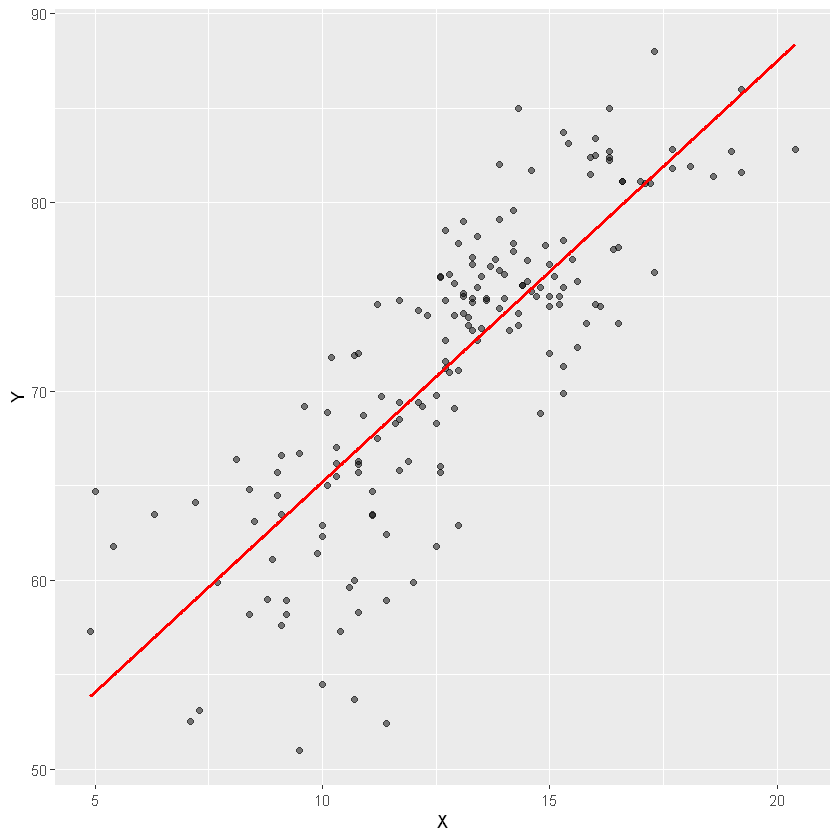

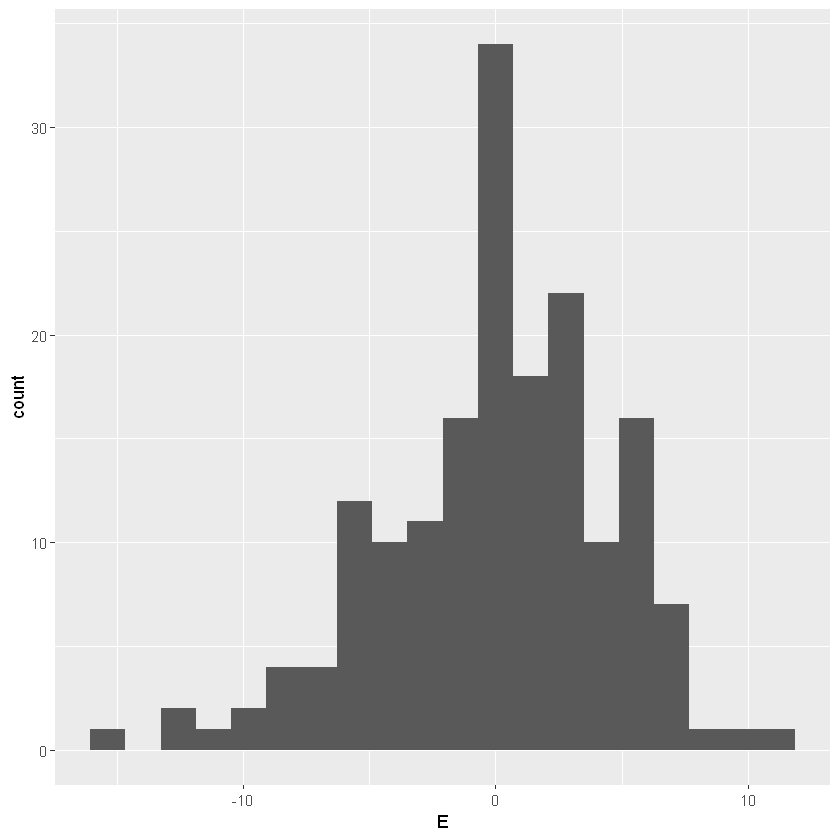

In [13]:
data2015_filtered <- data2015 %>% filter(!is.na(schooling) & !is.na(life_expectancy))
X <- data2015_filtered$schooling
Y <- data2015_filtered$life_expectancy
c(a, b) %<-% regression(X, Y)
E <- Y - a * X - b
ggplot() + geom_histogram(aes(x=E), bins=20)

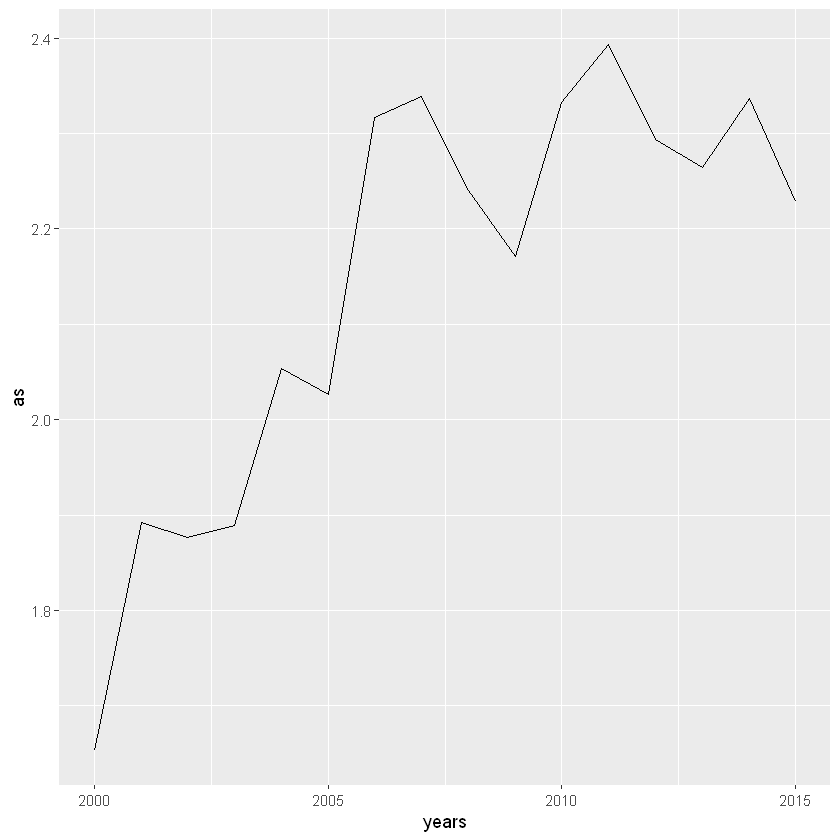

In [206]:
as <- c()
bs <- c()
years <- sort(unique(data$year))
for (y in years) {
    data_filtered <- data %>% filter(year == y & !is.na(schooling) & !is.na(life_expectancy))
    X <- data_filtered$schooling
    Y <- data_filtered$life_expectancy
    c(a, b) %<-% regression(X, Y, display_plot = FALSE)
    as <- append(as, a)
    bs <- append(bs, b)
}

ggplot() + geom_line(aes(x=years, y=as))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 10 rows containing non-finite values (`stat_bin()`)."


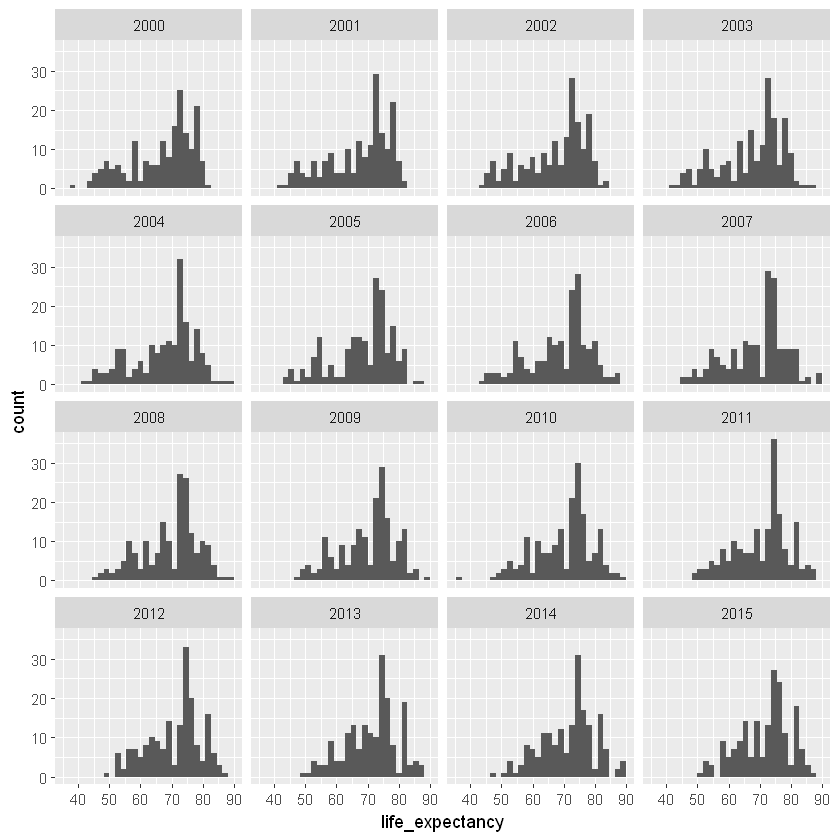

In [208]:
ggplot(data, aes(x=life_expectancy)) + geom_histogram() + facet_wrap(~year)

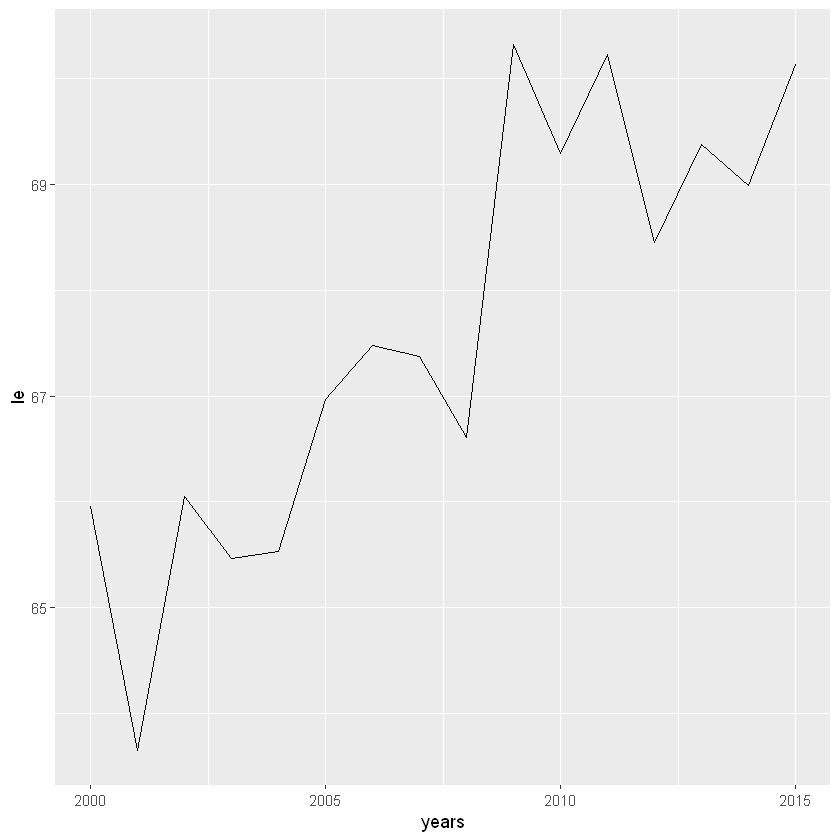

In [9]:
le <- c()
years <- sort(unique(data$year))

for (y in years) {
    data_year <- data %>% filter(year == y & !is.na(life_expectancy) & !is.na(population))
    mean_lf <- sum(data_year$life_expectancy * data_year$population) / sum(data_year$population)
    le <- append(le, mean_lf)
}

ggplot() + geom_line(aes(x=years, y=le))

[1]    0.3644112 -663.9382578

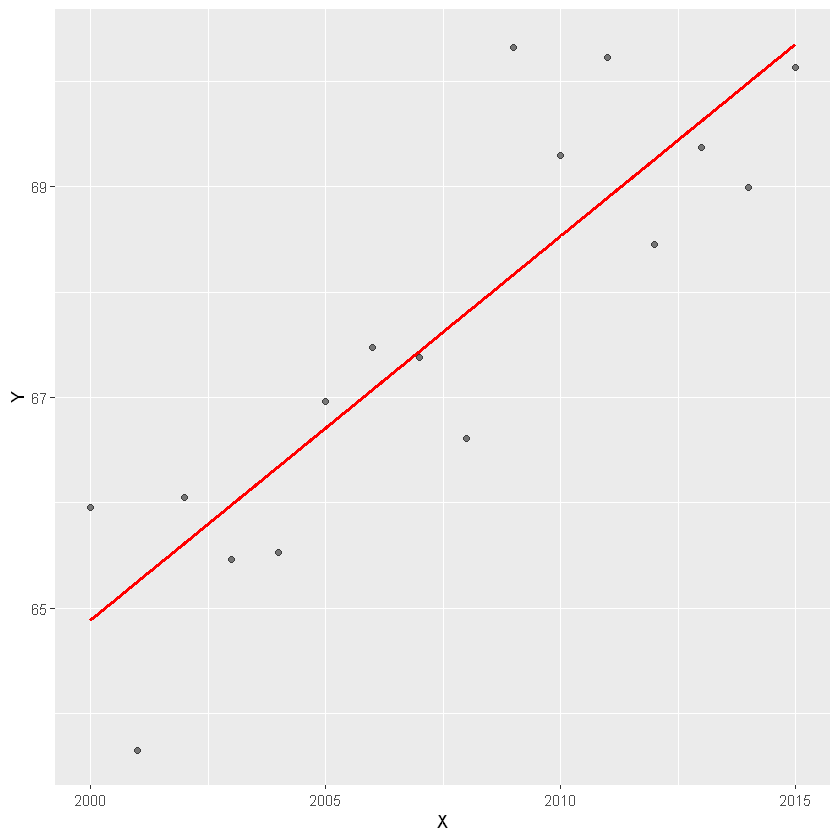

In [14]:
regression(years, le)

[1] "Pearson"           "0.404876761126602"
[1] "Spearman"          "0.442504524305733"


Warning message:
"Removed 203 rows containing missing values (`geom_point()`)."


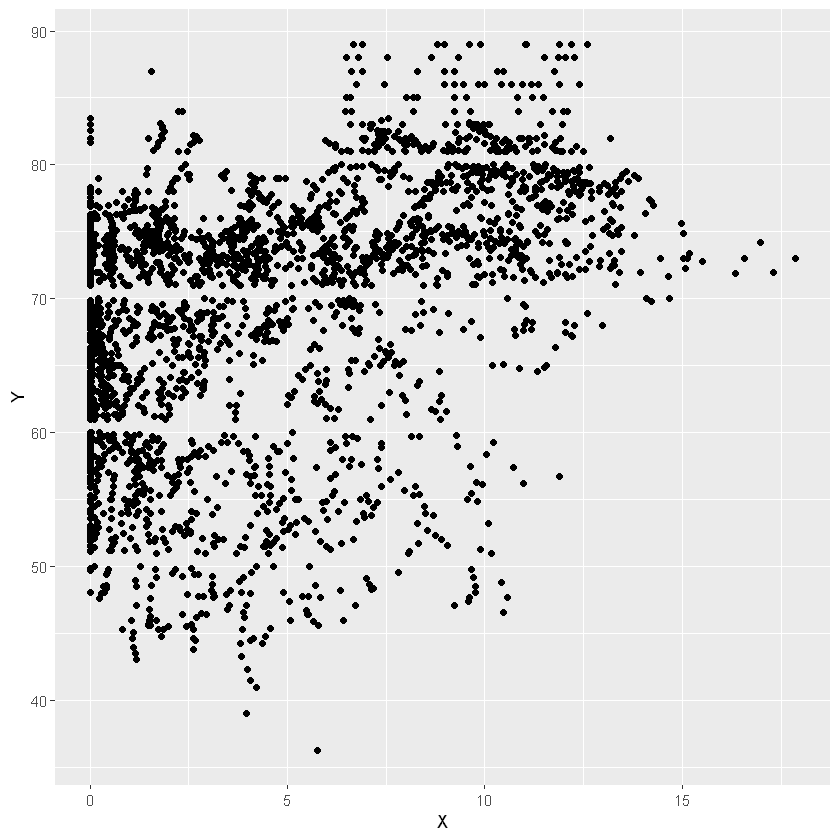

In [11]:
analysis(data$alcohol, data$life_expectancy)

[1] "Pearson"            "-0.556556253400693"
[1] "Spearman"           "-0.753641880116125"


Warning message:
"Removed 10 rows containing missing values (`geom_point()`)."


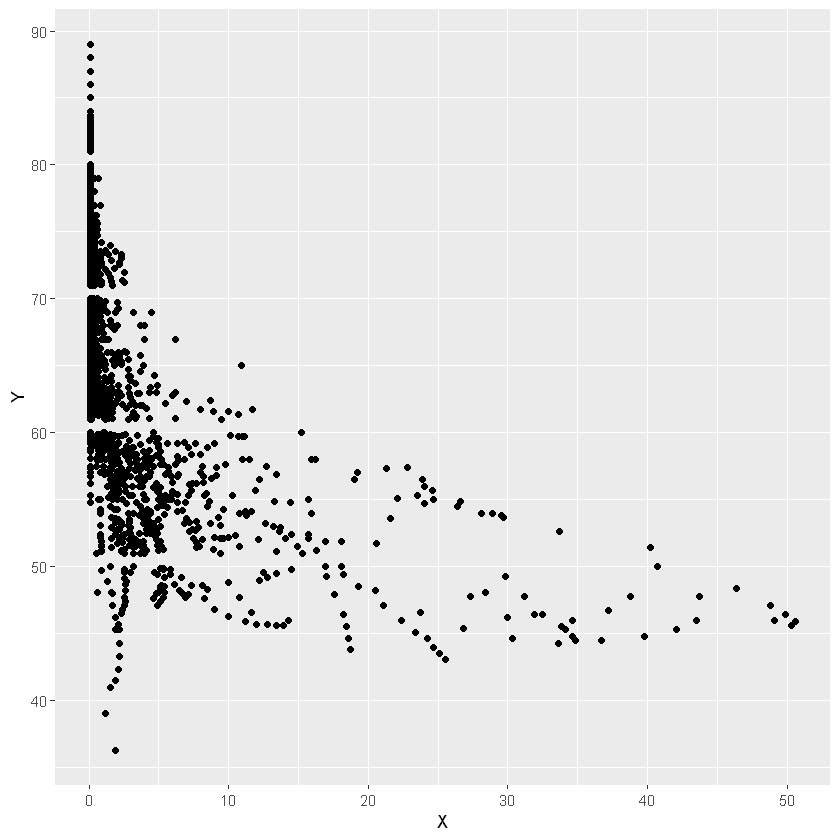

In [45]:
analysis(data$HIV_AIDS, data$life_expectancy)

[1] "Pearson"           "0.461455192620738"
[1] "Spearman"          "0.642470938054315"


Warning message:
"Removed 453 rows containing missing values (`geom_point()`)."


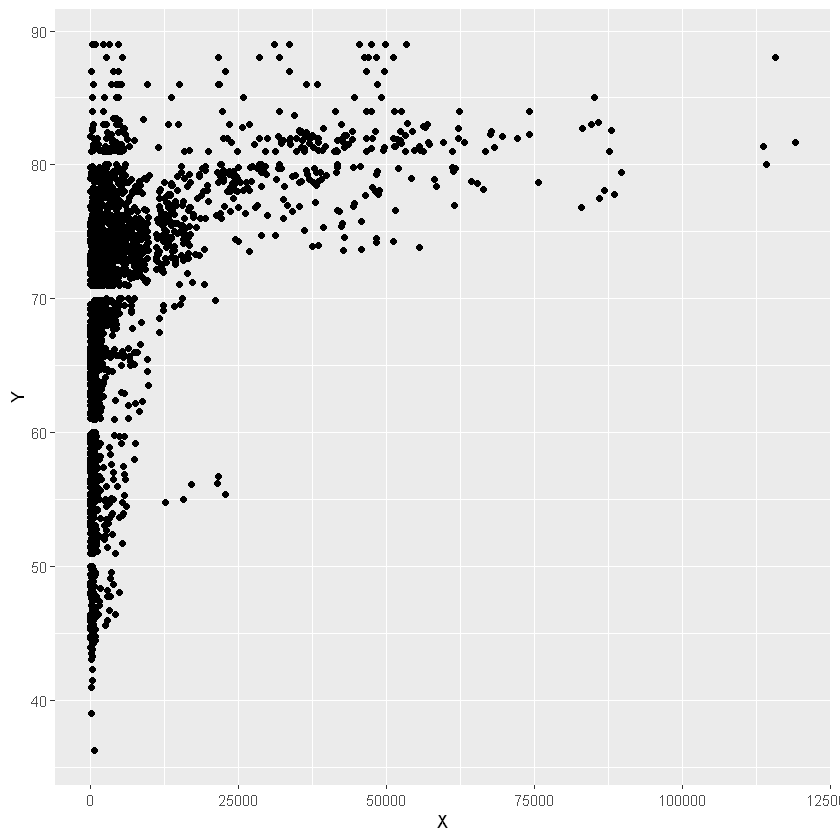

In [46]:
analysis(data$GDP, data$life_expectancy)

[1] "Pearson"            "-0.696359313769976"
[1] "Spearman"           "-0.650006967892821"


Warning message:
"Removed 10 rows containing missing values (`geom_point()`)."


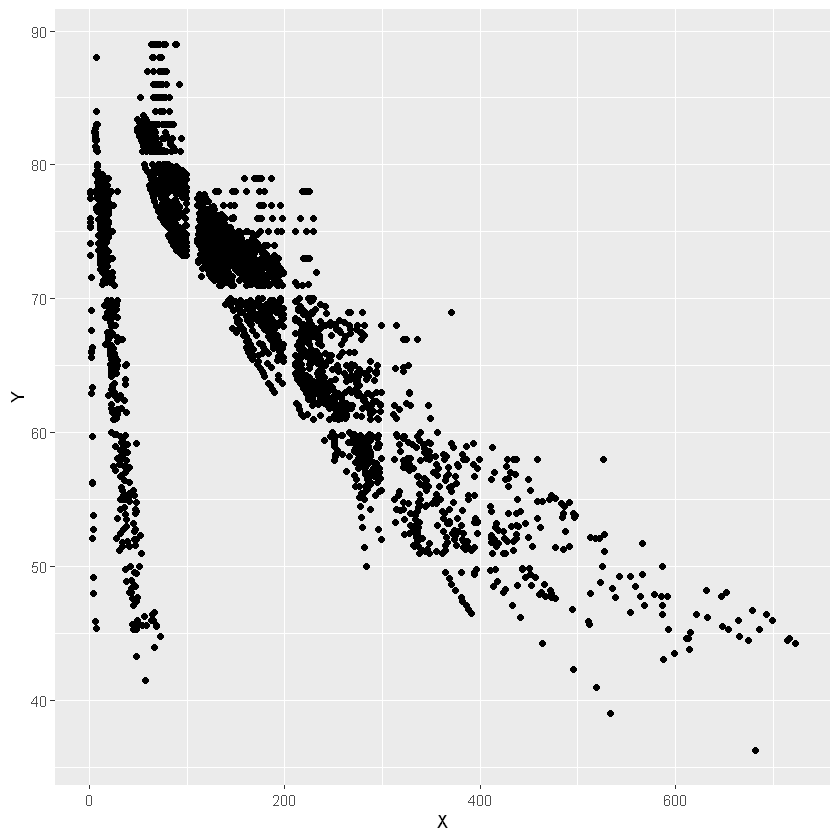

In [47]:
analysis(data$adult_mortality, data$life_expectancy)

Warning message:
"Removed 10 rows containing missing values (`geom_point()`)."
Warning message:
"Removed 630 rows containing missing values (`geom_line()`)."


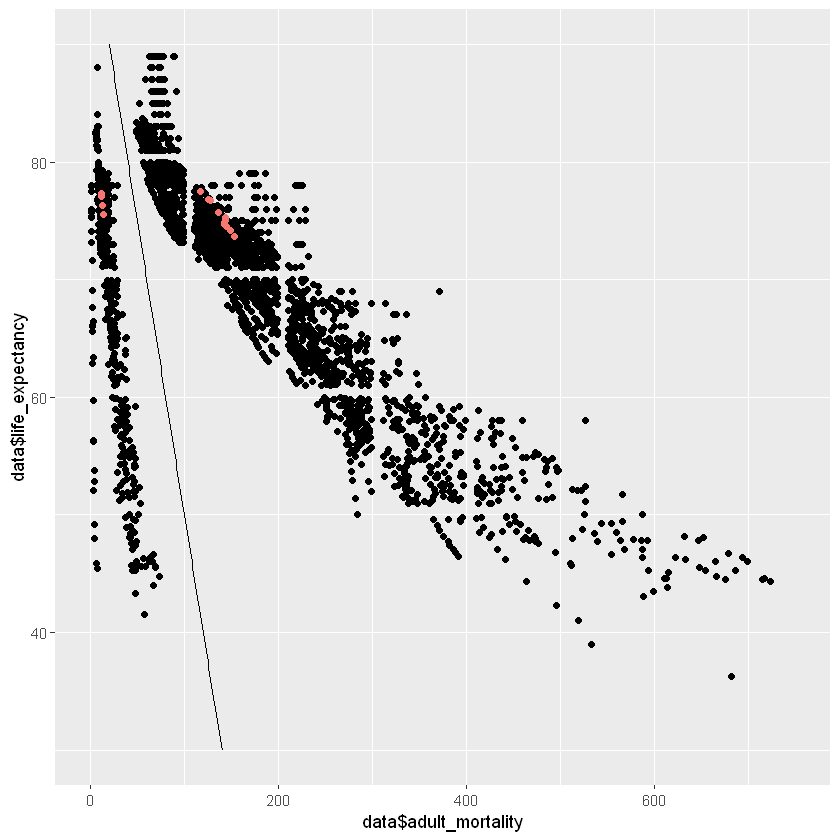

In [19]:
xs <- seq(0, 750, 1)
a <- -0.5
b <- 100
ys <- a * xs + b
ggplot() +
    geom_point(aes(data$adult_mortality, data$life_expectancy)) +
    geom_point(aes(poland$adult_mortality, poland$life_expectancy, col='red')) +
    geom_line(aes(xs, ys)) +
    ylim(30, 90) +
    theme(legend.position='none')

Warning message:
"Use of `data$type` is discouraged.
ℹ Use `type` instead."
Warning message:
"Removed 10 rows containing missing values (`geom_point()`)."


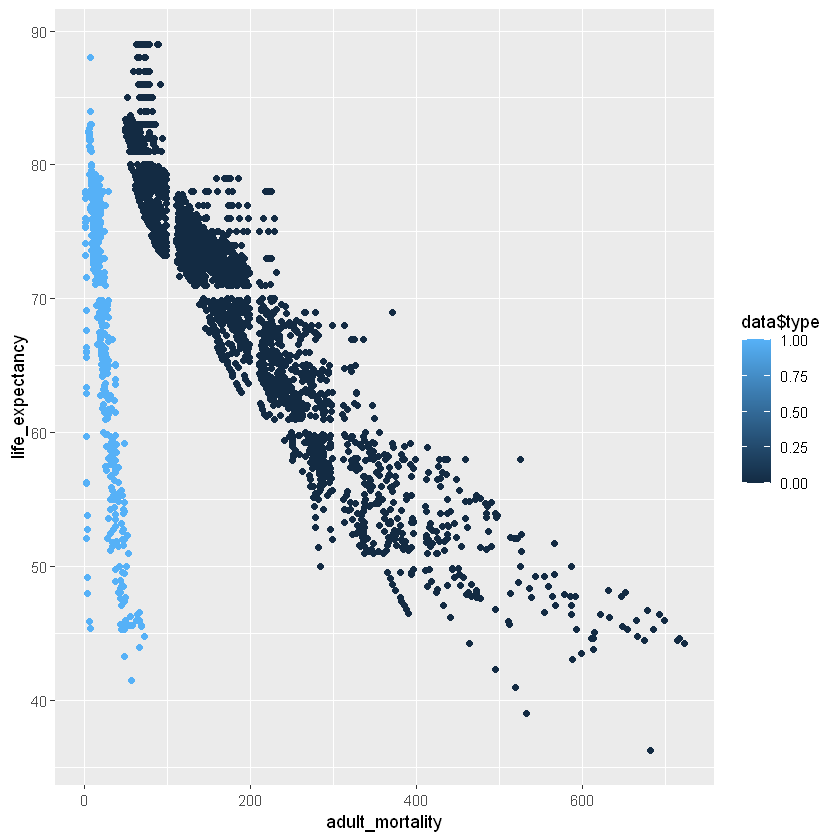

In [20]:
data$type <- 0
data$type[data$life_expectancy < a * data$adult_mortality + b] <- 1
ggplot(data, aes(x=adult_mortality, y=life_expectancy, col=data$type)) + geom_point()

Warning message:
"Removed 10 rows containing non-finite values (`stat_bin()`)."


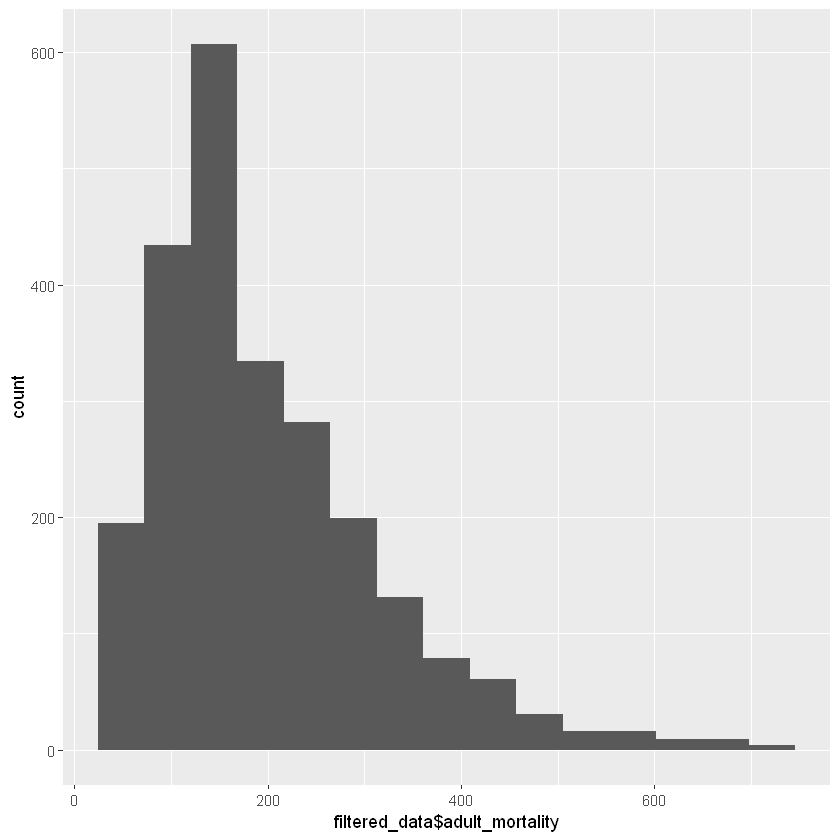

In [27]:
filtered_data <- data %>% filter(type == 0)
ggplot() + geom_histogram(aes(filtered_data$adult_mortality), bins=15)

In [36]:
data %>% filter(type == 1)

country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_B,measles,⋯,total_expenditure,diphtheria,HIV_AIDS,GDP,population,thinness_1_19_years,thinness_5_9_years,income_composition_of_resources,schooling,type
<chr>,<int>,<chr>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,⋯,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,2002,Developing,56.2,3,88,0.01,16.887351,64,2486,⋯,7.76,36,0.1,187.84595,21979923,19.9,2.2,0.341,6.2,1
Albania,2014,Developing,77.5,8,0,4.51,428.749067,98,0,⋯,5.88,98,0.1,4575.76379,288914,1.2,1.3,0.761,14.2,1
Albania,2008,Developing,75.3,1,1,5.61,36.622068,99,0,⋯,5.87,99,0.1,437.53965,2947314,1.6,1.6,0.713,12.0,1
Albania,2007,Developing,75.9,9,1,5.58,32.246552,98,22,⋯,6.10,98,0.1,363.13685,29717,1.6,1.7,0.703,11.6,1
Albania,2005,Developing,73.5,15,1,5.16,26.993121,98,6,⋯,6.12,98,0.1,279.14293,311487,1.8,1.8,0.685,10.8,1
Albania,2004,Developing,73.0,17,1,4.54,221.842800,99,7,⋯,6.38,97,0.1,2416.58824,326939,1.8,1.9,0.681,10.9,1
Albania,2003,Developing,72.8,18,1,4.29,14.719289,97,8,⋯,6.27,97,0.1,189.68156,339616,1.9,2.0,0.674,10.7,1
Albania,2002,Developing,73.3,15,1,3.73,104.516916,96,16,⋯,6.30,98,0.1,1453.64278,3511,2.0,2.1,0.670,10.7,1
Albania,2001,Developing,73.6,14,1,4.25,96.205571,96,18,⋯,6.00,97,0.1,1326.97339,36173,2.1,2.1,0.662,10.6,1


[1] "Pearson"           "0.301557394491553"
[1] "Spearman"          "0.481300846443494"


Warning message:
"Removed 472 rows containing missing values (`geom_point()`)."


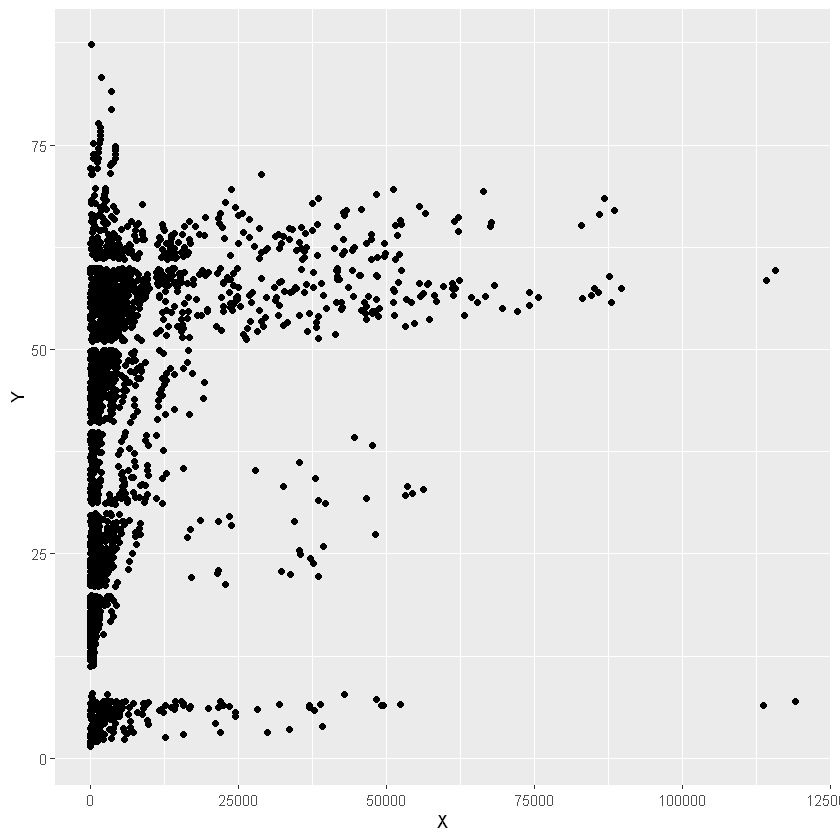

In [48]:
analysis(data$GDP, data$BMI)

[1] "Pearson"           "0.751975462736698"
[1] "Spearman"          "0.813541004769093"


Warning message:
"Removed 170 rows containing missing values (`geom_point()`)."


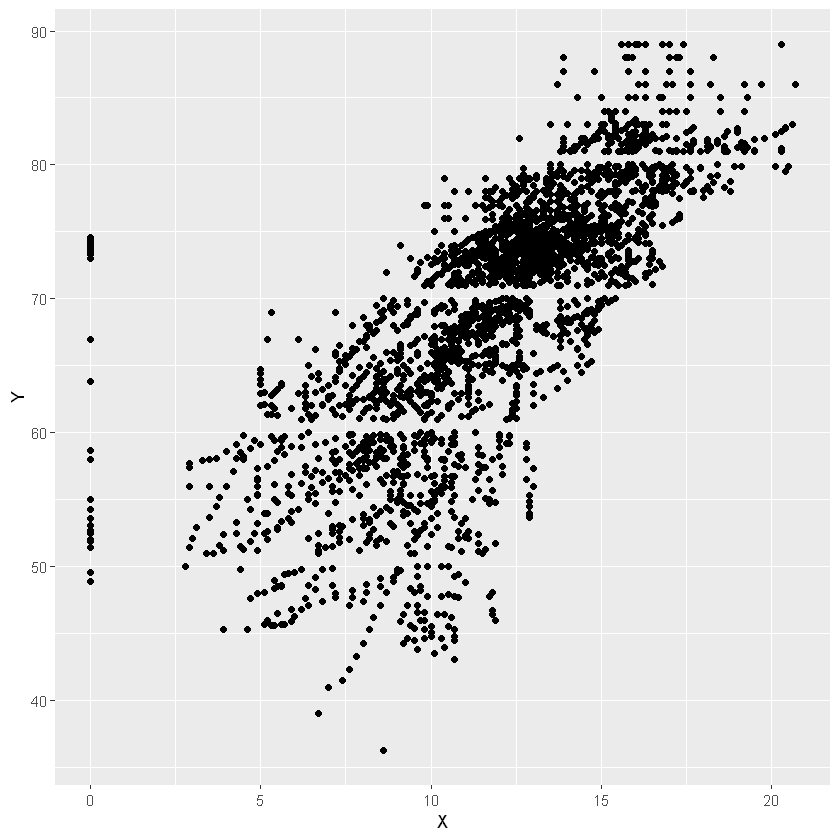

In [49]:
analysis(data$schooling, data$life_expectancy)

[1] "Pearson"           "0.448272829450722"
[1] "Spearman"          "0.665285017917609"


Warning message:
"Removed 451 rows containing missing values (`geom_point()`)."


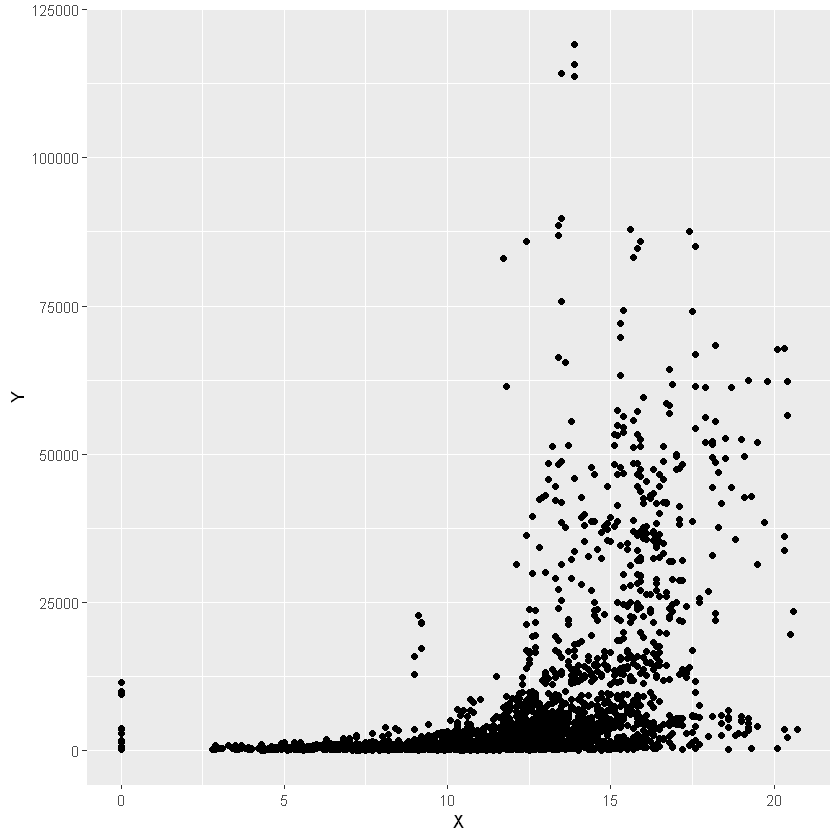

In [50]:
analysis(data$schooling, data$GDP)

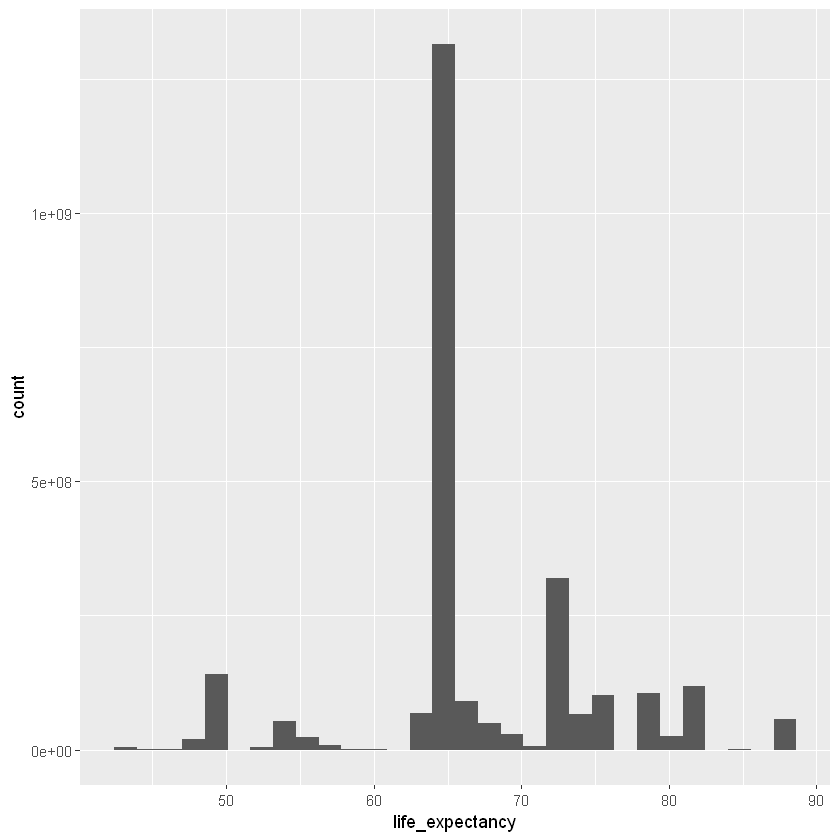

In [35]:
ggplot(data[data$year == 2005,], aes(life_expectancy, weight=population)) + geom_histogram(bins=30)

[1] "Pearson"           "0.907363860239579"
[1] "Spearman"          "0.905150749344808"


Warning message:
"Removed 10 rows containing missing values (`geom_point()`)."


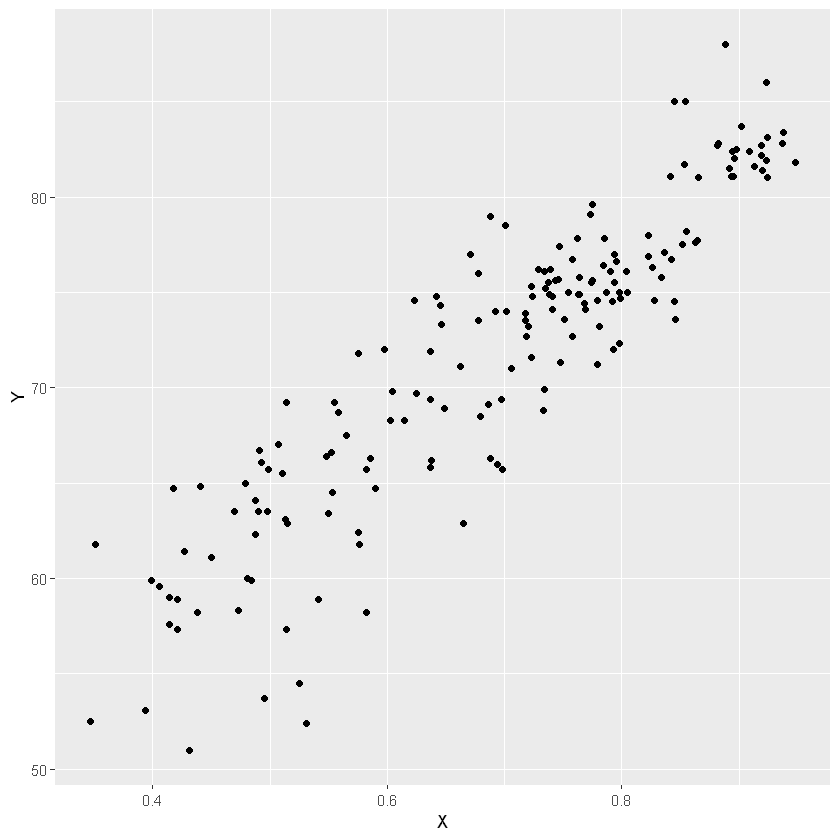

In [76]:
analysis(data2015$income_composition_of_resources, data2015$life_expectancy)

[1] "Pearson"           "0.818159436788872"
[1] "Spearman"          "0.844347924774132"


Warning message:
"Removed 10 rows containing missing values (`geom_point()`)."


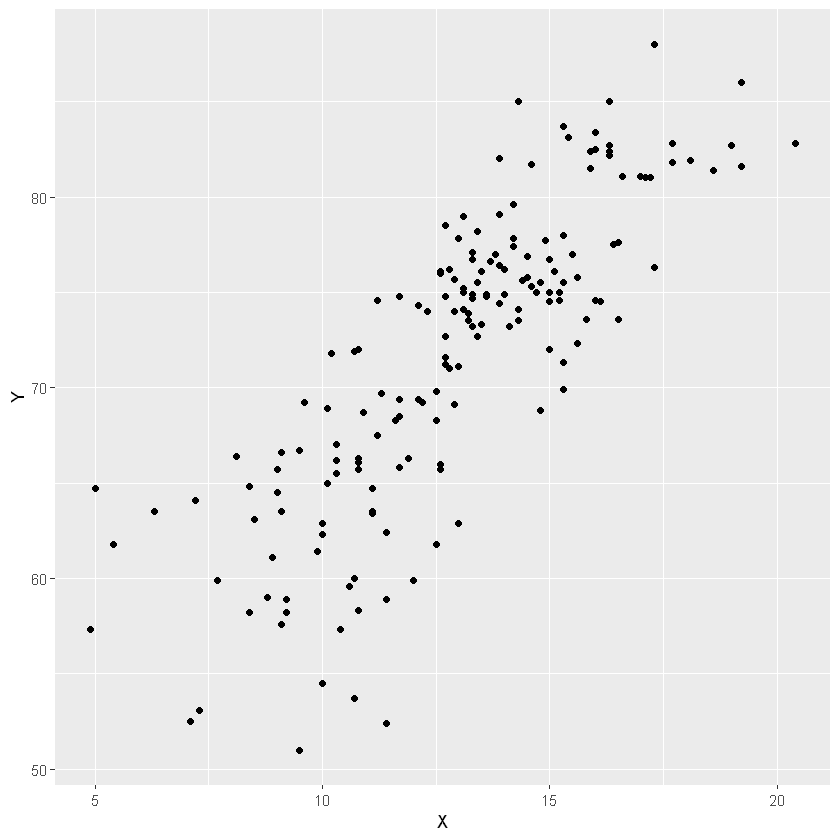

In [55]:
analysis(data2015$schooling, data2015$life_expectancy)

[1] "Pearson"            "-0.608344937357291"
[1] "Spearman"           "-0.777014609759447"


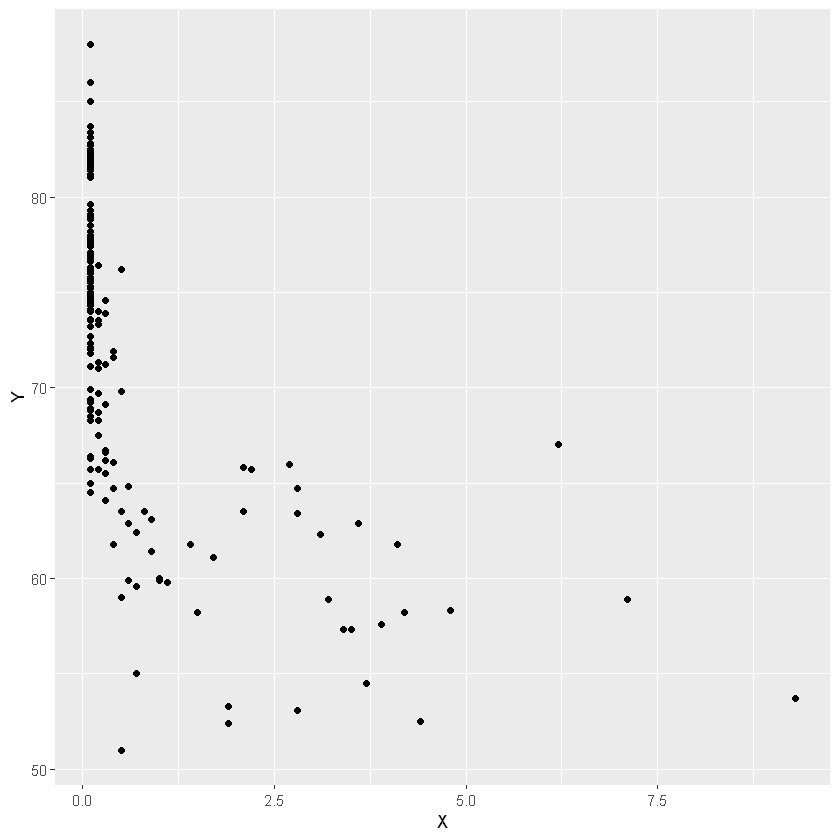

In [77]:
analysis(data2015$HIV_AIDS, data2015$life_expectancy)

[1] "Pearson"           "0.454491013399891"
[1] "Spearman"          "0.567500961689245"


Warning message:
"Removed 29 rows containing missing values (`geom_point()`)."


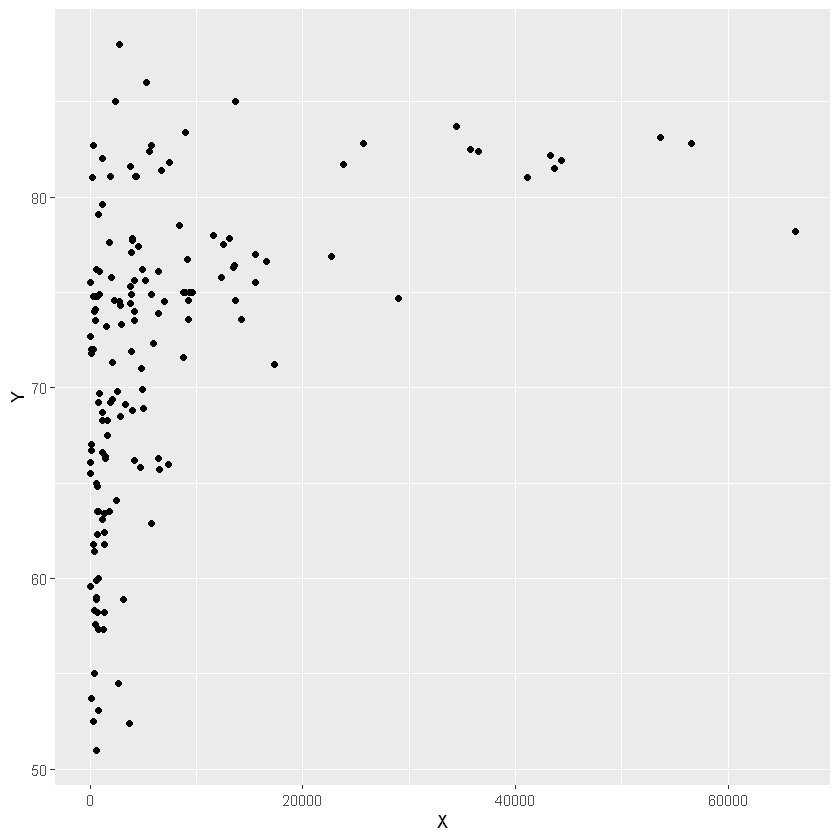

In [14]:
analysis(data2015$GDP, data2015$life_expectancy)

In [7]:
correlations <- data.frame()
years <- sort(unique(data$year))
for (y in years) {
    data_year <- data %>% filter(year == y)
    rs <- c()
    for (column in colnames(data_year[5:22])) {
        r <- cor(data_year$life_expectancy, data_year[column], use="pairwise.complete.obs", method="kendall")
        rs <- append(rs, r)
    }
    correlations <- rbind(correlations, rs)
}
correlations <- cbind(years, correlations)
names(correlations) <- colnames(data[c(2, 5:22)])
correlations

year,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_B,measles,BMI,under_five_deaths,polio,total_expenditure,diphtheria,HIV_AIDS,GDP,population,thinness_1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2000,-0.4957653,-0.4130803,0.28272807,0.371209971,0.08711256,-0.30468809,0.4304245,-0.4321816,0.4074715,0.2026260,0.3596421,-0.5648887,0.4842644,-0.0917659035,-0.3851752,-0.3820287,0.5636755,0.5805814
2001,-0.5024740,-0.4335143,0.26875701,0.359534523,0.11878408,-0.32939250,0.4635253,-0.4496344,0.3920324,0.1955527,0.4200280,-0.5900506,0.4910325,-0.2155603759,-0.3503580,-0.3509475,0.6075839,0.5726098
2002,-0.5048538,-0.4400805,0.28894384,0.388869733,0.19491047,-0.30812057,0.4672706,-0.4530102,0.3898342,0.1768097,0.4056689,-0.5660684,0.5184545,-0.0871498121,-0.4169309,-0.3913229,0.6047972,0.5657628
2003,-0.4864669,-0.4377216,0.28617546,0.391725475,0.23047119,-0.24618006,0.4341994,-0.4440826,0.4151125,0.1787849,0.4078770,-0.5981419,0.4962223,-0.1177576560,-0.3956001,-0.4057886,0.6257447,0.5763065
2004,-0.6338772,-0.4367853,0.29062443,0.363209068,0.19787692,-0.16232836,0.4061473,-0.4427139,0.3312728,0.1779357,0.3847484,-0.6142258,0.4715407,-0.0557861099,-0.4164567,-0.4323920,0.6373517,0.5842530
2005,-0.4773166,-0.4333272,0.29289365,0.395243119,0.22584311,-0.11494519,0.3521368,-0.4340301,0.3278940,0.1802332,0.3567700,-0.6186150,0.4996080,-0.0133347050,-0.4304668,-0.4824761,0.6469695,0.5863253
2006,-0.5183087,-0.4433996,0.30023155,0.386393447,0.21975489,-0.17809128,0.4459362,-0.4477708,0.3432141,0.2247256,0.3604740,-0.6079229,0.4604301,-0.1175369900,-0.4696520,-0.5038925,0.7177829,0.6266369
2007,-0.5198214,-0.4305976,0.29745190,0.348556942,0.24340701,-0.14487314,0.4410419,-0.4416360,0.3471949,0.2147755,0.3712641,-0.6207140,0.4250835,-0.0867120871,-0.4856267,-0.4811240,0.7101574,0.6055900
2008,-0.6670885,-0.4266592,0.29195590,0.324851312,0.26899164,-0.08516398,0.4204082,-0.4375477,0.3689115,0.1397231,0.3572855,-0.6192845,0.4107687,-0.1104701036,-0.4906133,-0.4820963,0.6978062,0.5908941


# Polska

In [82]:
poland

country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_B,measles,⋯,polio,total_expenditure,diphtheria,HIV_AIDS,GDP,population,thinness_1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
<chr>,<int>,<chr>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,⋯,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Poland,2015,Developed,77.5,117,2,NA,0.000000,96,0,⋯,92,NA,98,0.1,12565.9876,37986412,1.9,2.0,0.852,16.4
Poland,2014,Developed,77.3,12,2,10.71,243.808475,96,0,⋯,94,6.35,98,0.1,14341.6750,3811735,1.9,2.1,0.850,16.4
Poland,2013,Developed,77.1,12,2,11.63,23.435335,96,84,⋯,95,6.40,99,0.1,1378.5491,384196,2.0,2.1,0.838,15.4
Poland,2012,Developed,76.8,125,2,10.81,230.040097,97,71,⋯,95,6.62,99,0.1,13145.1484,3863164,2.0,2.1,0.834,15.3
Poland,2011,Developed,76.7,128,2,10.93,250.077378,98,0,⋯,96,6.70,99,0.1,13893.1877,3863255,2.0,2.2,0.829,15.4
Poland,2010,Developed,76.3,13,2,10.59,220.491685,98,13,⋯,96,6.88,99,0.1,12599.5249,3842794,2.1,2.2,0.822,15.1
Poland,2009,Developed,75.7,136,2,10.70,1299.159757,98,115,⋯,96,7.12,99,0.1,11527.5932,3815163,2.1,2.3,0.818,15.1
Poland,2008,Developed,75.5,14,2,11.40,15.714748,98,0,⋯,96,6.88,99,0.1,141.4469,38125759,2.2,2.3,0.813,15.0
Poland,2007,Developed,75.3,144,2,10.90,14.304245,98,40,⋯,99,6.28,99,0.1,1126.3185,381256,2.2,2.4,0.808,15.0


[1] "Pearson"           "0.991807943340656"
[1] "Spearman"          "0.997058823529412"


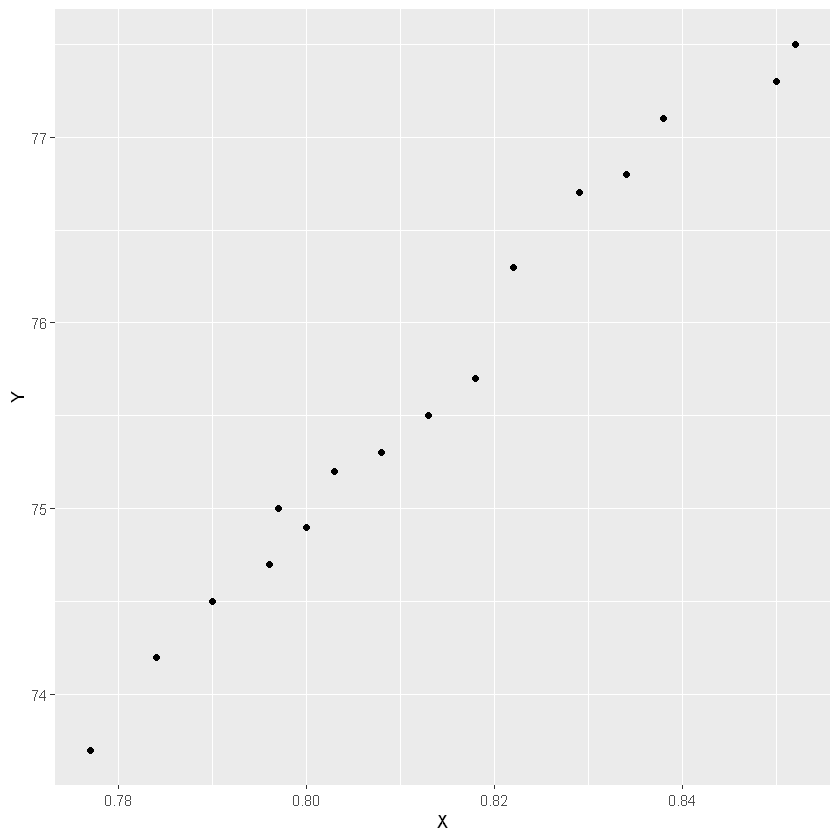

In [91]:
analysis(poland$income_composition_of_resources, poland$life_expectancy)

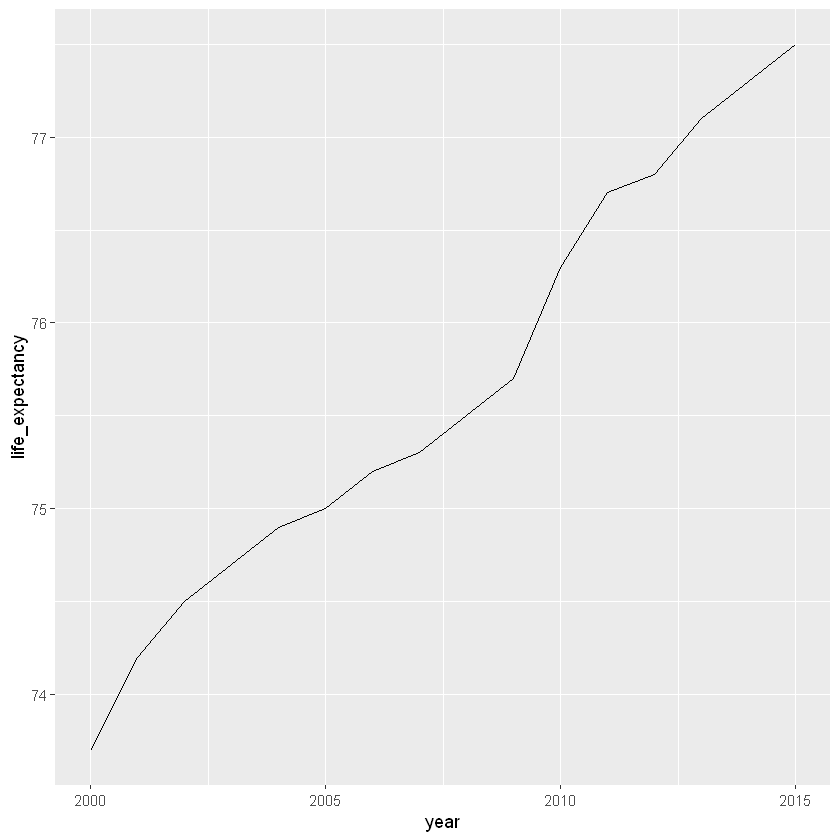

In [5]:
ggplot(poland, aes(x=year, y=life_expectancy)) + geom_line(show.legend = FALSE)

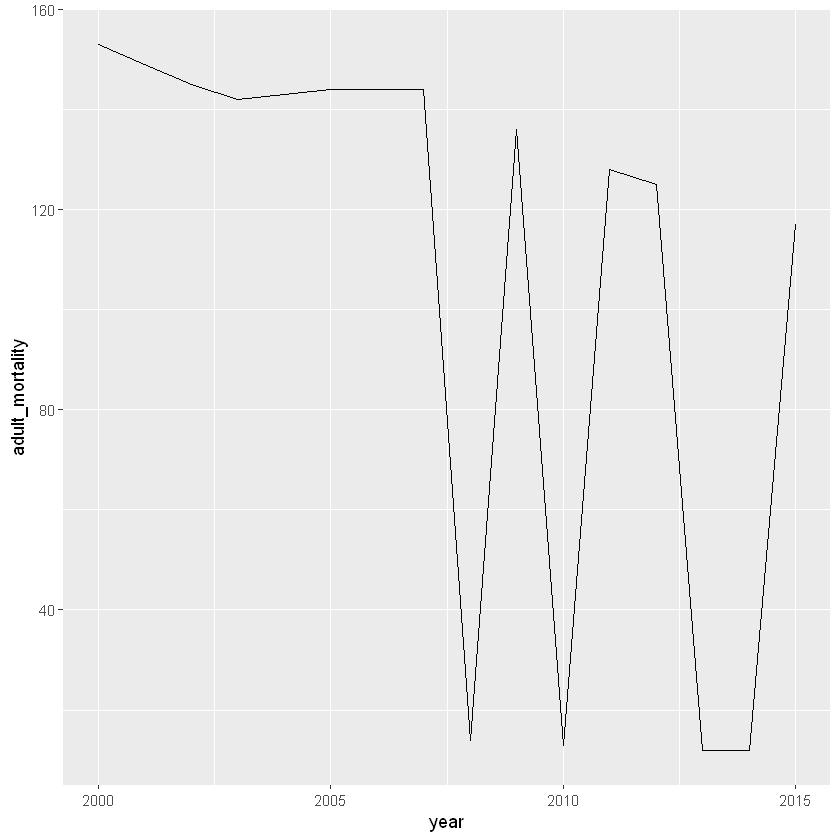

In [29]:
ggplot(poland, aes(x=year, y=adult_mortality)) + geom_line(show.legend = FALSE)

# Scattery

Warning message:
"Removed 10 rows containing missing values (`geom_point()`)."


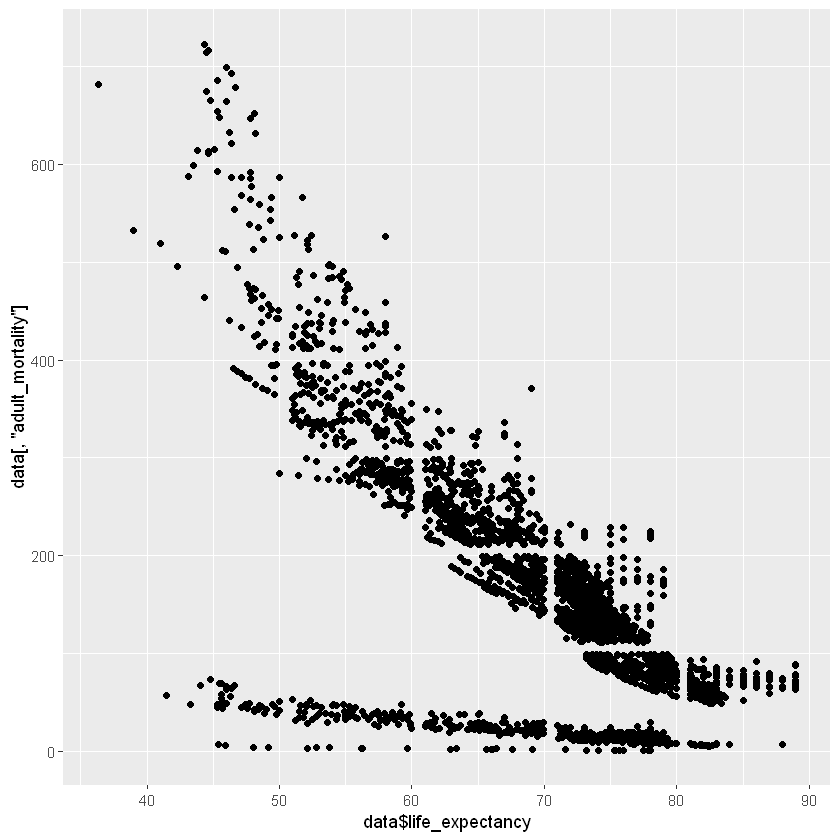

In [48]:
plt <- ggplot() + geom_point(aes(data[,"adult_mortality"]))
plt

Warning message:
"Removed 10 rows containing missing values (`geom_point()`)."
Warning message:
"Removed 10 rows containing missing values (`geom_point()`)."


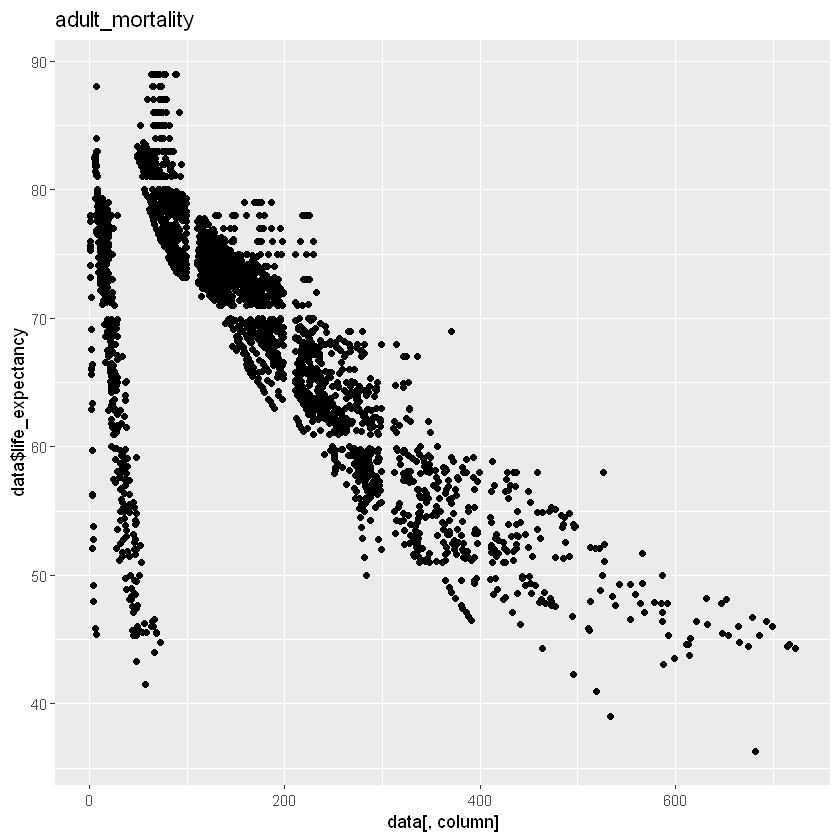

Warning message:
"Removed 203 rows containing missing values (`geom_point()`)."


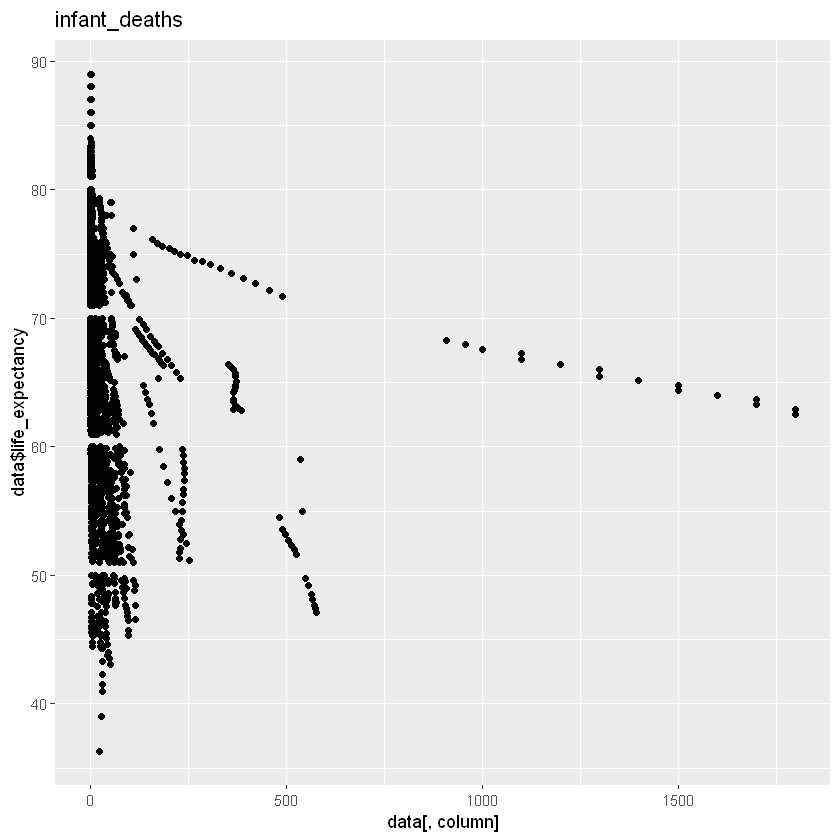

Warning message:
"Removed 10 rows containing missing values (`geom_point()`)."


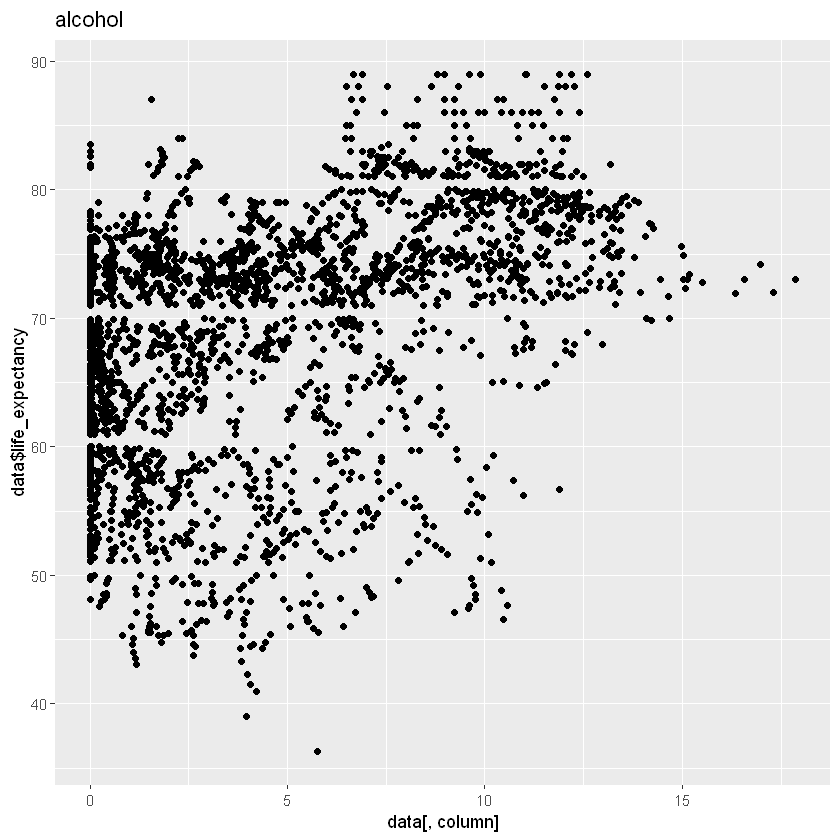

Warning message:
"Removed 563 rows containing missing values (`geom_point()`)."


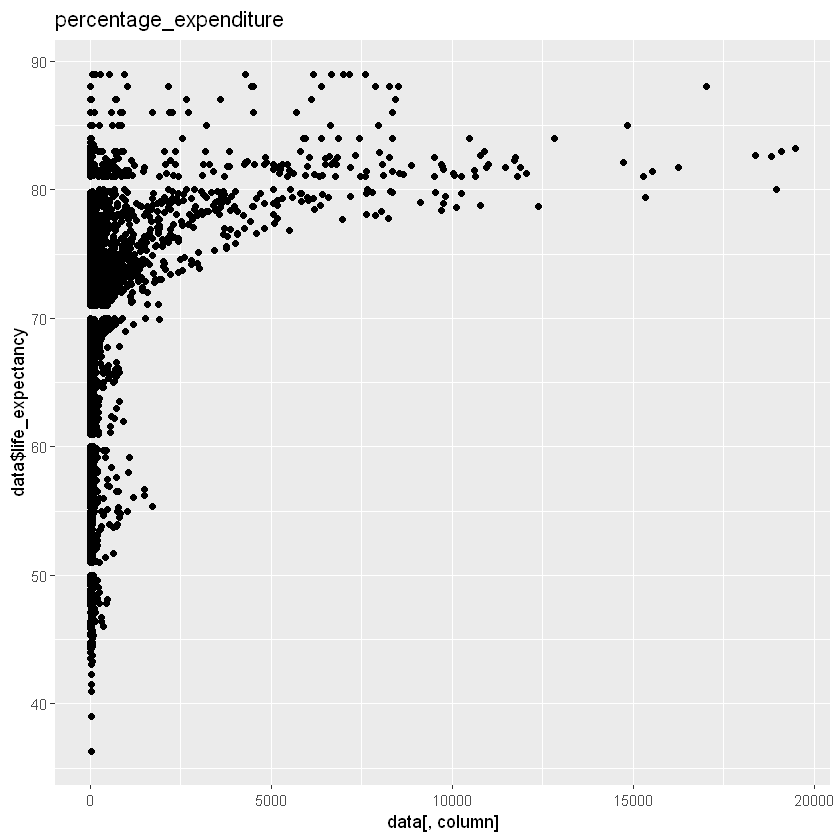

Warning message:
"Removed 10 rows containing missing values (`geom_point()`)."


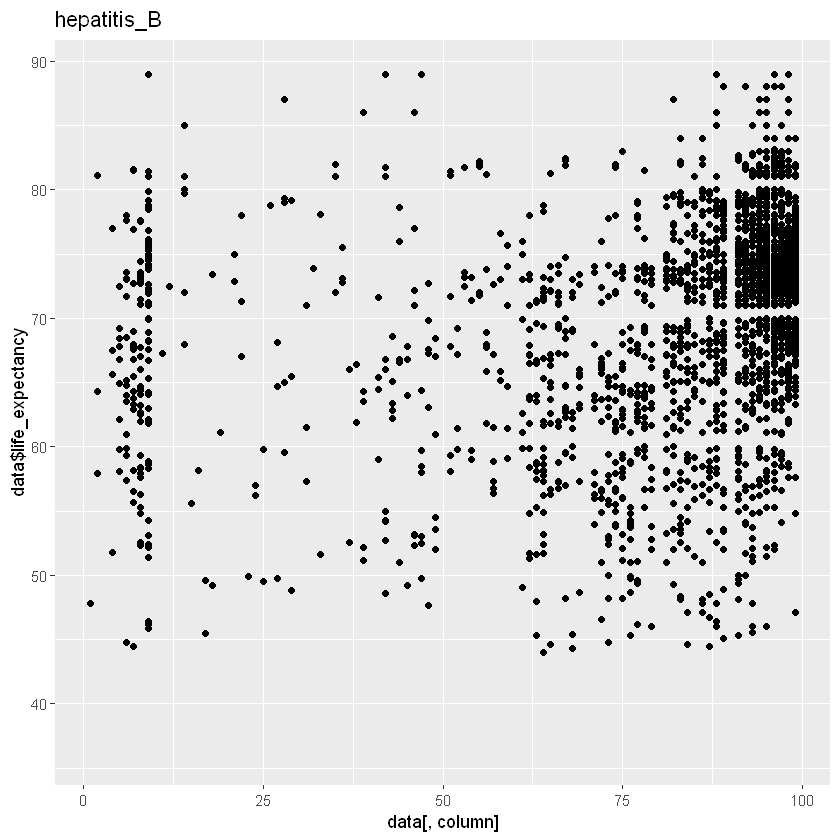

Warning message:
"Removed 42 rows containing missing values (`geom_point()`)."


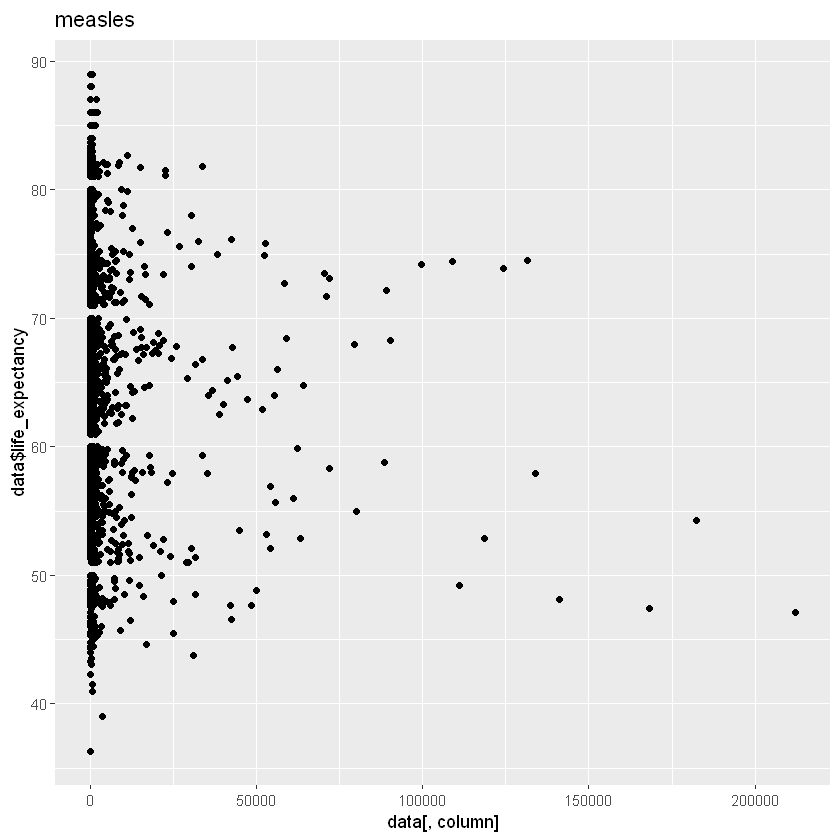

Warning message:
"Removed 10 rows containing missing values (`geom_point()`)."


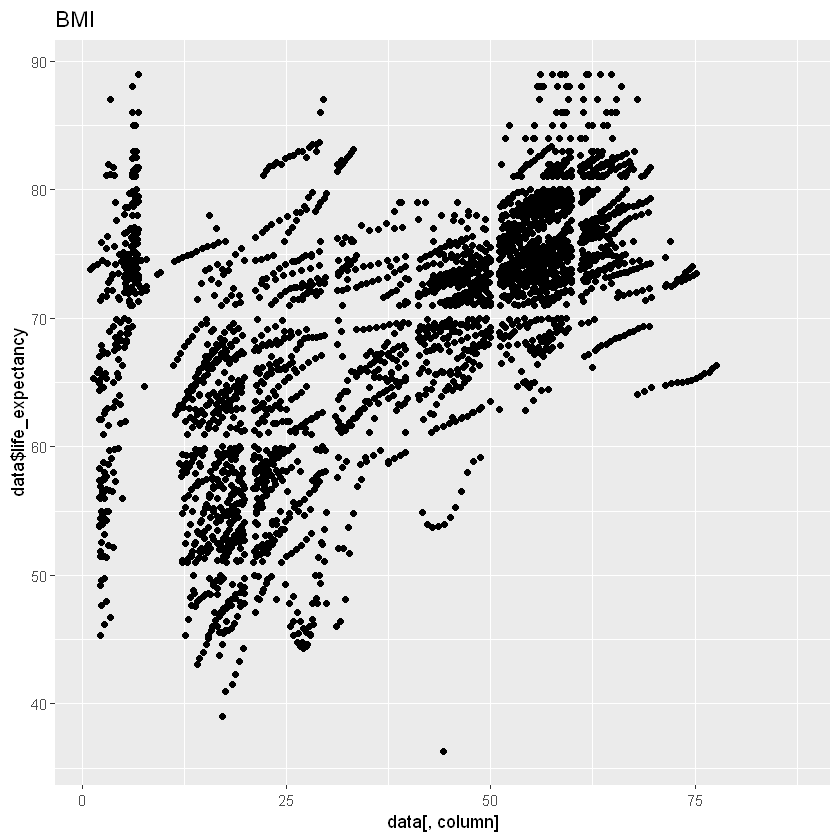

Warning message:
"Removed 29 rows containing missing values (`geom_point()`)."


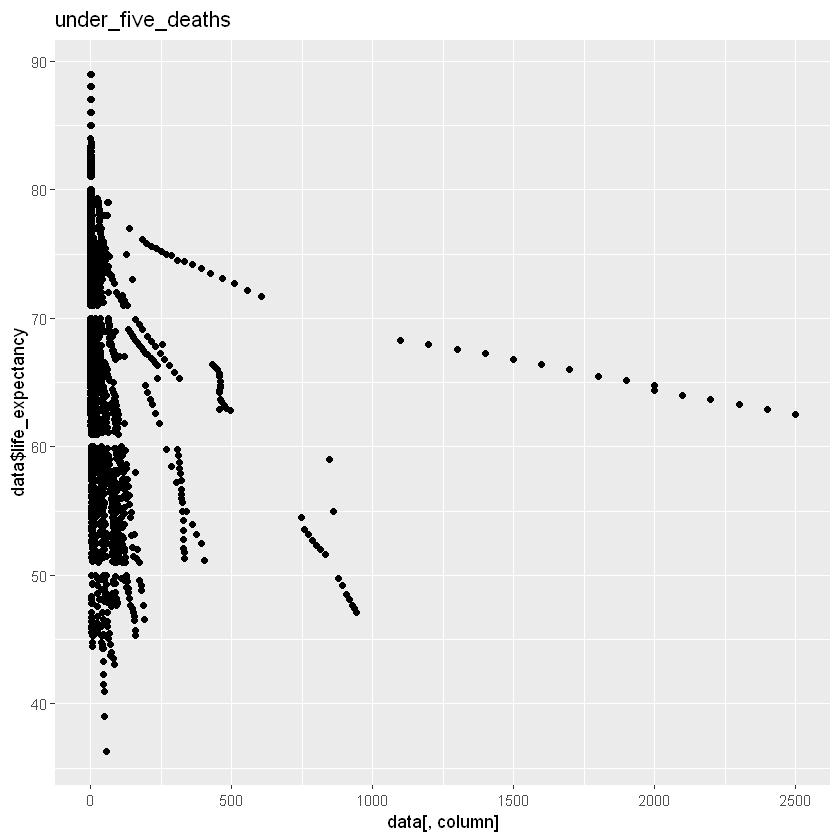

Warning message:
"Removed 236 rows containing missing values (`geom_point()`)."


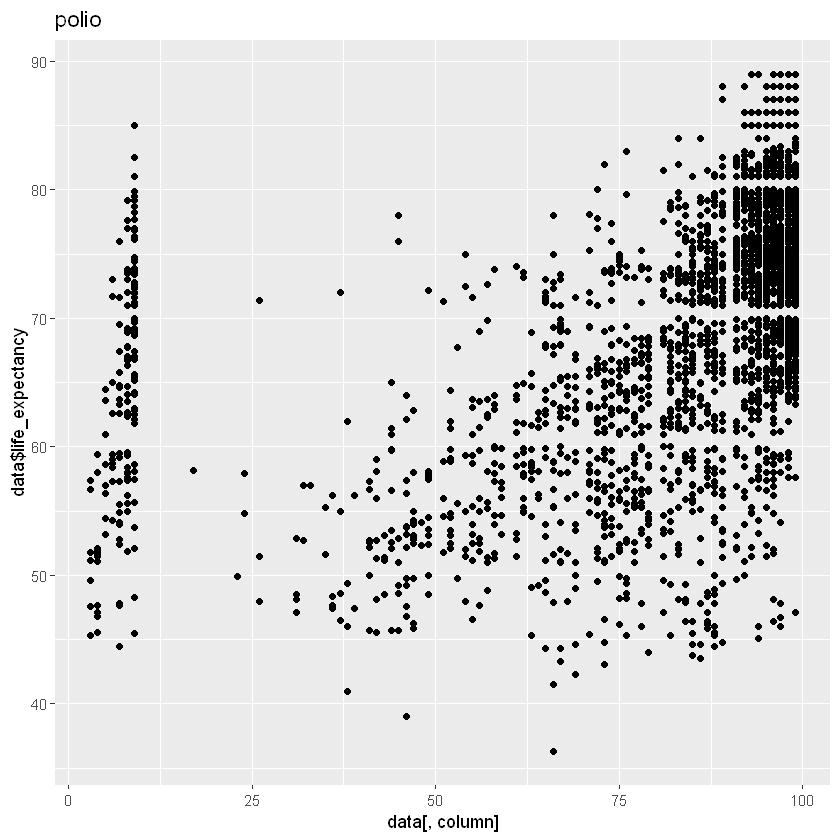

Warning message:
"Removed 29 rows containing missing values (`geom_point()`)."


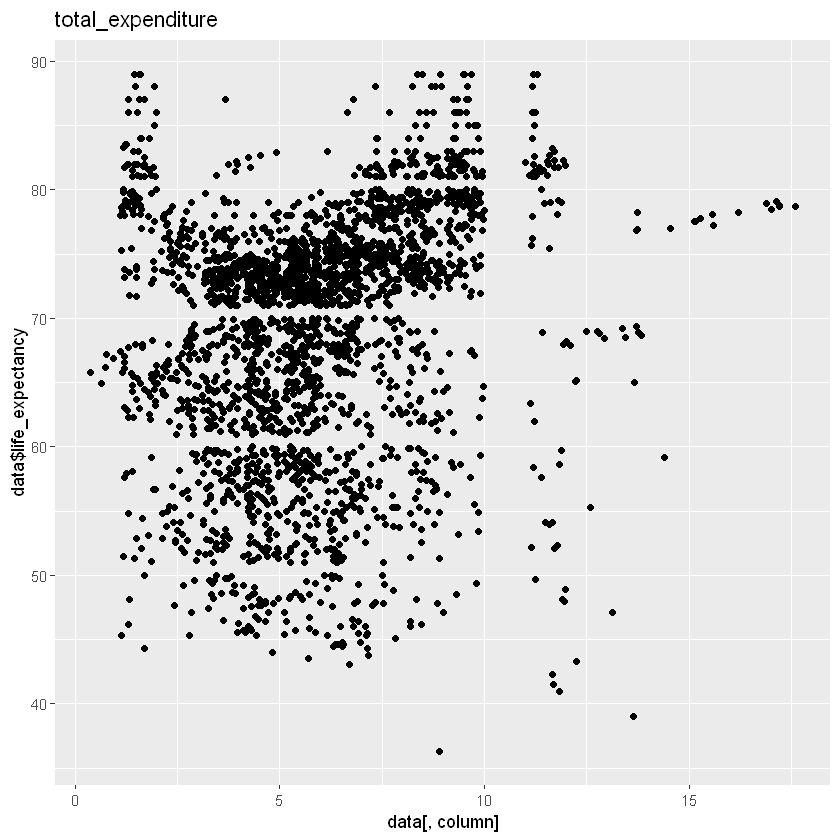

Warning message:
"Removed 10 rows containing missing values (`geom_point()`)."


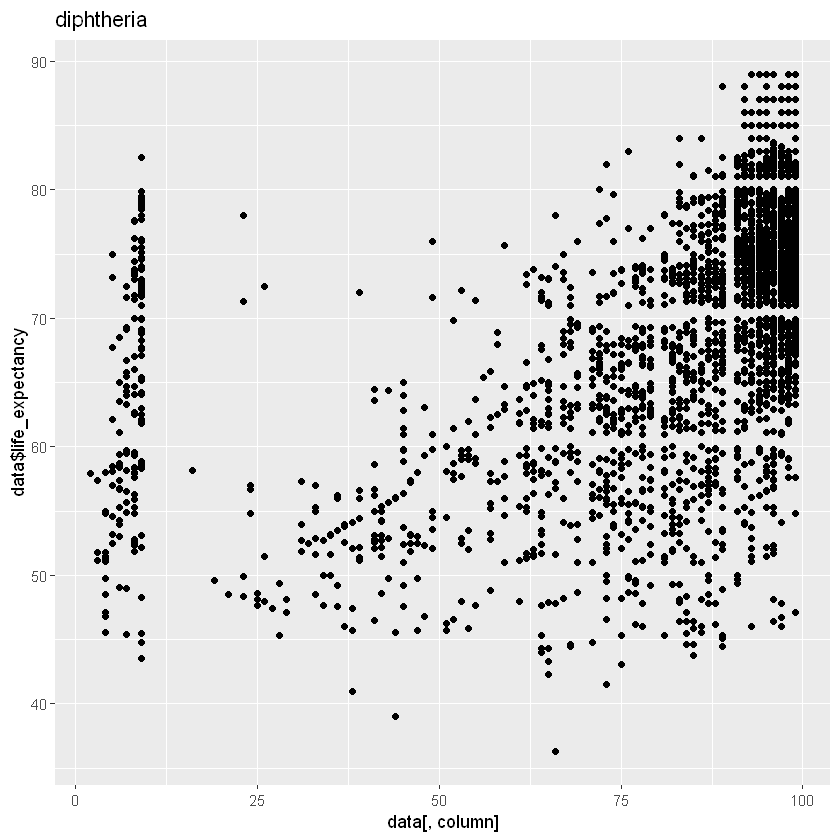

Warning message:
"Removed 453 rows containing missing values (`geom_point()`)."


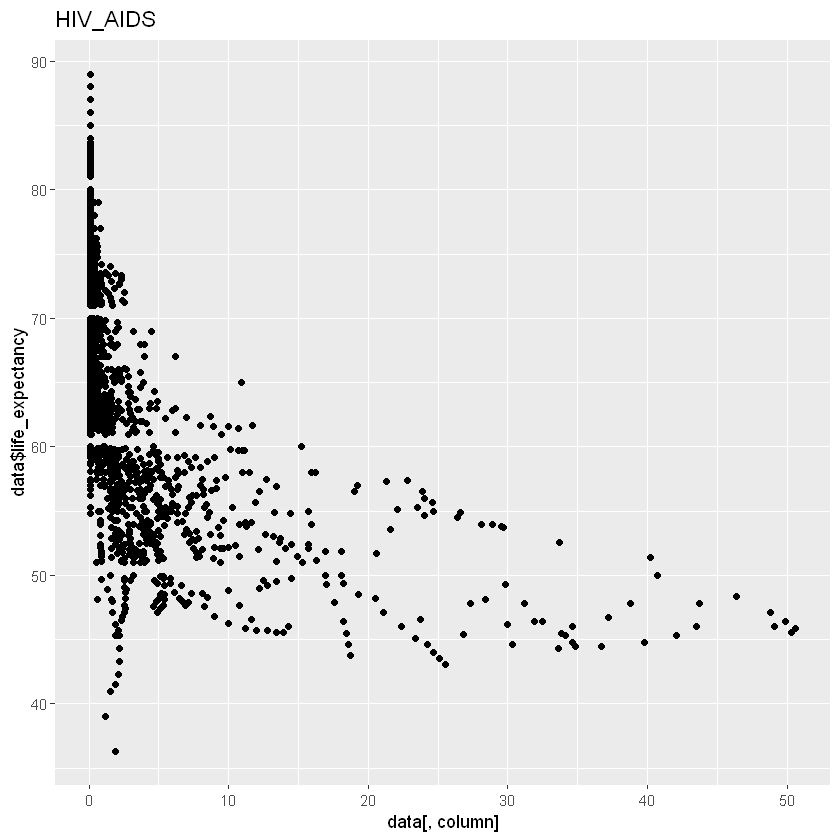

Warning message:
"Removed 654 rows containing missing values (`geom_point()`)."


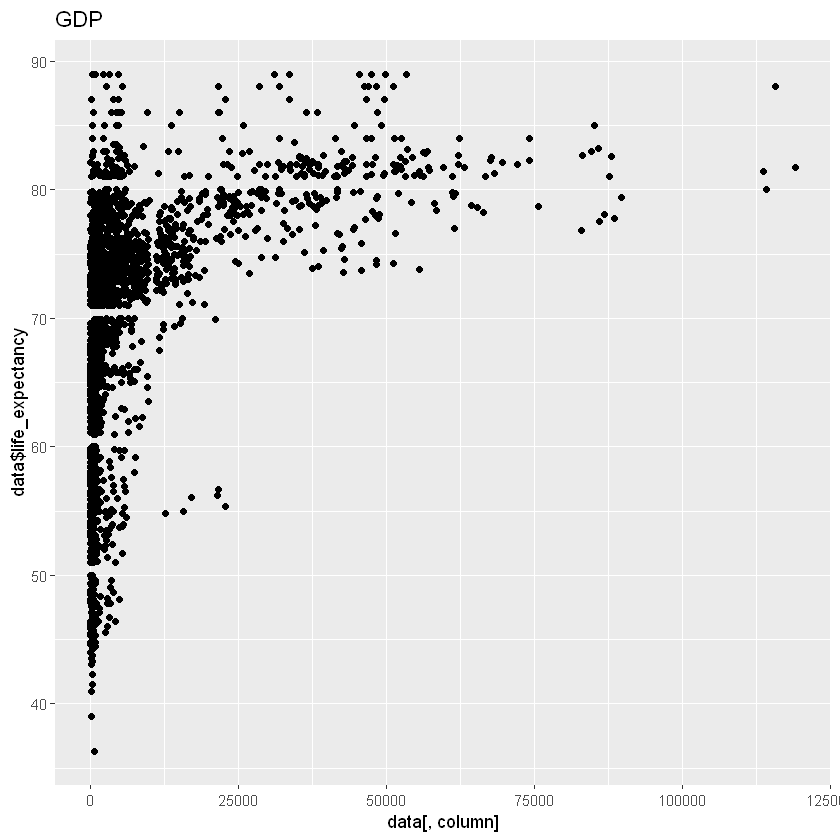

Warning message:
"Removed 42 rows containing missing values (`geom_point()`)."


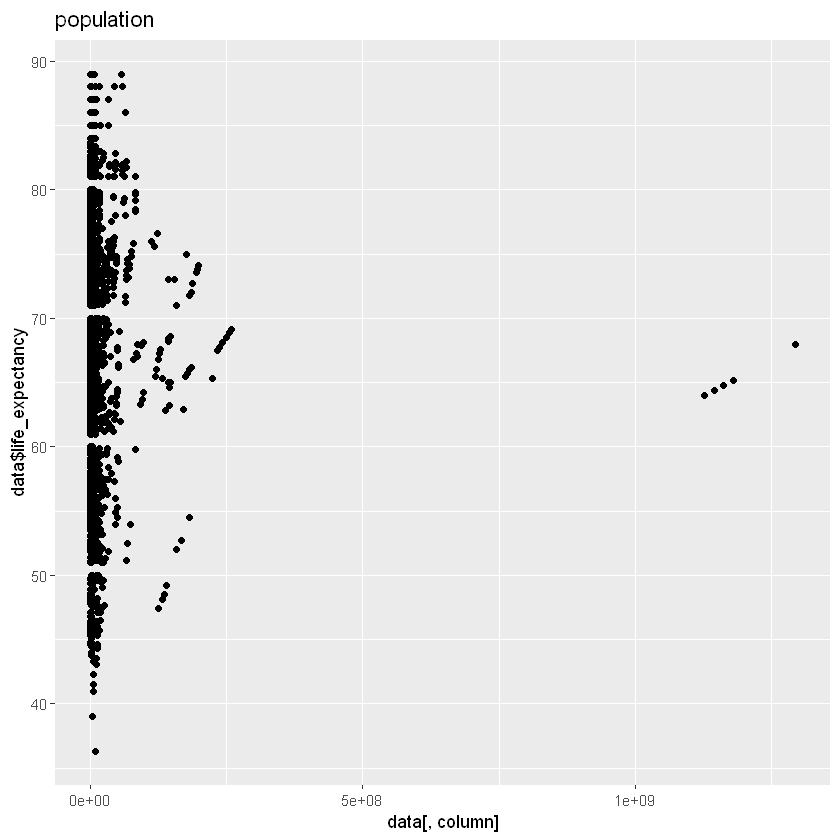

Warning message:
"Removed 42 rows containing missing values (`geom_point()`)."


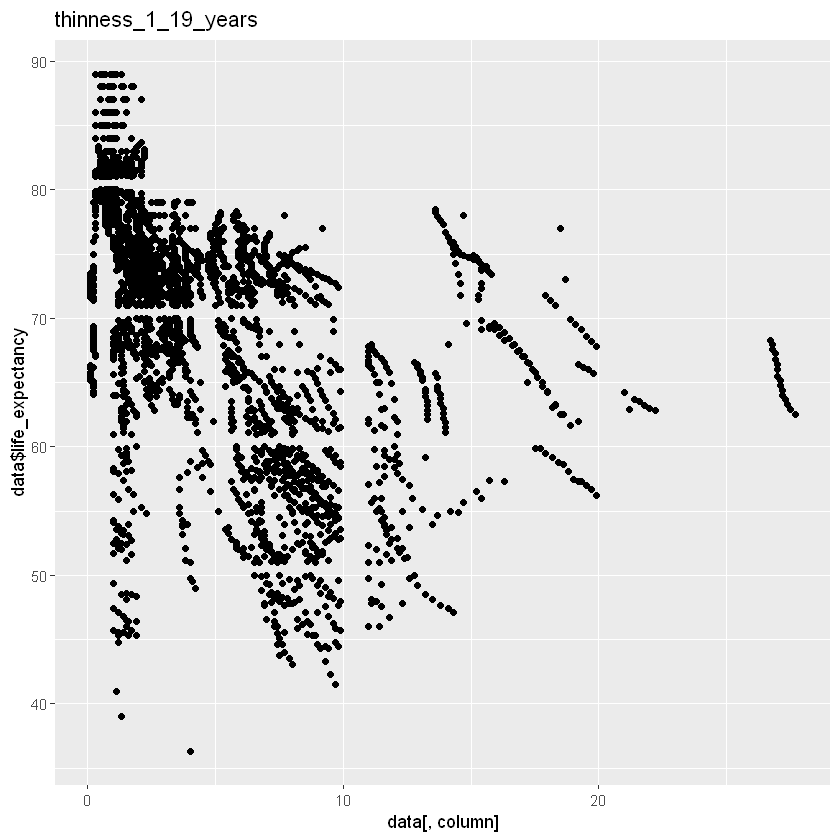

Warning message:
"Removed 170 rows containing missing values (`geom_point()`)."


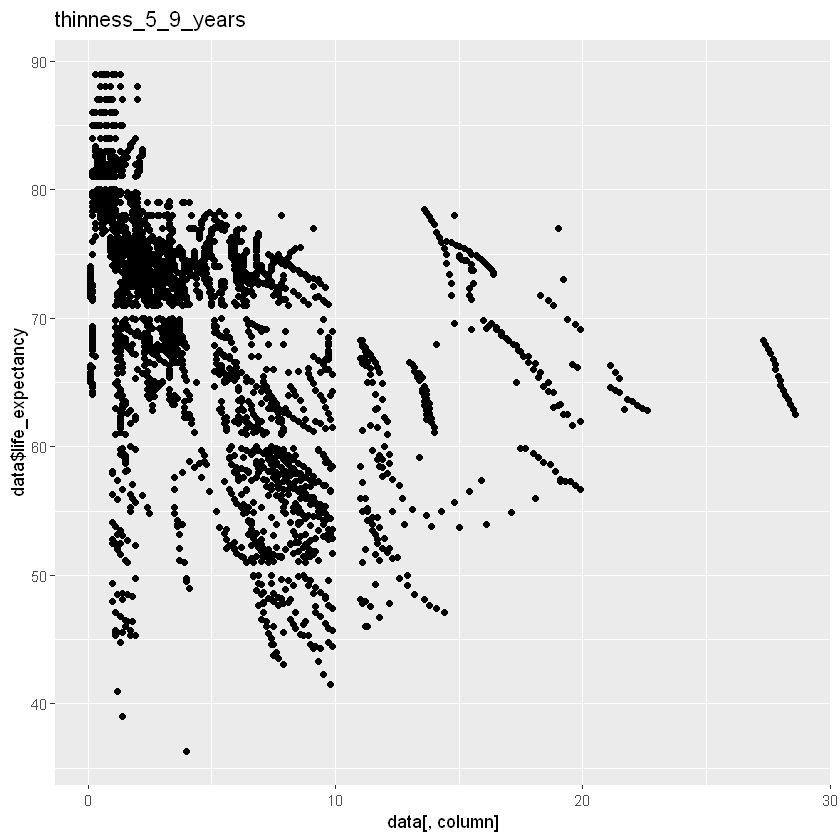

Warning message:
"Removed 170 rows containing missing values (`geom_point()`)."


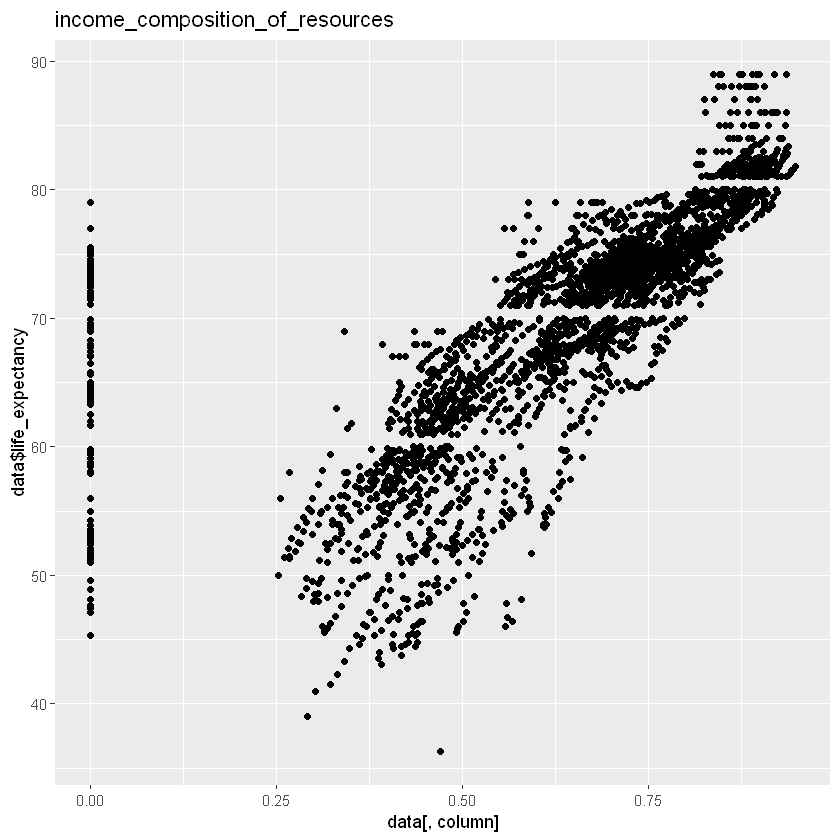

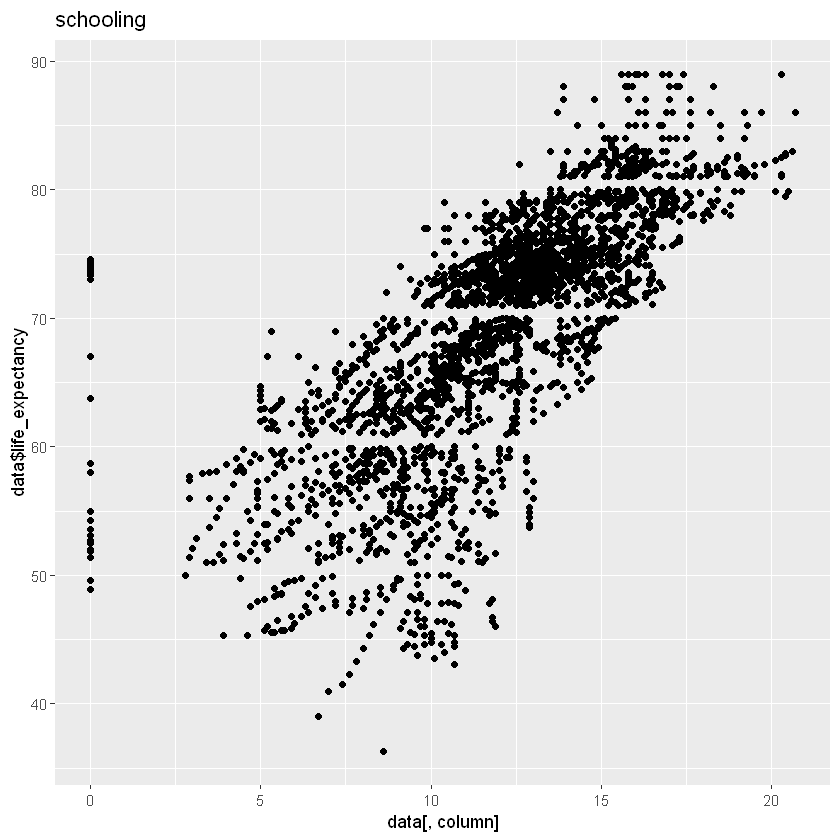

In [58]:
for (column in colnames(data[5:22])) {
    plt <- ggplot() + geom_point(aes(data[,column], data$life_expectancy)) + ggtitle(column)
    show(plt)
}